### Activation functions

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z) :
    a = 1 / ( 1 + np.exp(-z))
    return a

In [52]:
def softmax(z) :
    e = np.exp(z)

    return e / sum(e)

## Gradient of the cost function over the parameters **W1** , **W2** :



$$
\tag{1}
\frac{\partial J}{\partial W_2} = \frac{\partial J}{\partial \hat{y}  } * \frac{\partial \hat{y}}{\partial Z_2} * \frac{\partial Z_2}{\partial W_2}
$$

$$
\tag{1.1}
\frac{\partial J}{\partial Z_2} = \frac{1}{m} * (\hat{y} - y)
$$

$$
\tag{1.2}
\frac{\partial Z_2}{\partial W_2} = \frac{\partial (W_2*a_1)}{\partial W_2} = a_1
$$

$$ 
\Rightarrow  \frac{\partial J}{\partial W_2} =  \frac{1}{m} * (\hat{y} - y) * a_1^T
$$

W2 of shape (ny,nh+1)  
X of shape (m,nx+1)  
Z1 of shape (nh,m)  
a1 of shape (nh+1,m)  
y , yHat and (y-yHat) of shape (ny,m)  
$
\frac{\partial J}{\partial W_2}
$
 is of the same shape as W2   
 therefore , ( ny , m) * ( m , nh+1)
 so we'd take $ a_1^T. $







$$
\tag{2}
\frac{\partial J}{\partial W_1} = \frac{\partial J}{\partial \hat{y}  } * \frac{\partial \hat{y}}{\partial Z_2} * \frac{\partial Z_2}{\partial a_1} * \frac{\partial a_1}{\partial Z_1} * \frac{\partial Z_1}{\partial W_1 }  
= \frac{\partial J}{\partial Z_2  } * \frac{\partial Z_2}{\partial a_1} * \frac{\partial a_1}{\partial Z_1} * \frac{\partial Z_1}{\partial W_1 }
$$

$$
\tag{2.1}
\frac{\partial J}{\partial Z_2  } = \frac{1}{m} * ( \hat{y} - y)
$$

$$
\tag{2.2}
\frac{\partial Z_2}{\partial a_1} = \frac{\partial (W_2*a_1)}{\partial a_1} = W_2
$$

$$
\tag{2.3}
\frac{\partial a_1}{\partial Z_1} = \frac{\partial (\tanh Z_1)}{\partial Z_1} = 1 - \tanh(Z_1)^2 = 1 - a_1^2
$$


$$
\tag{2.4}
\frac{\partial Z_1}{\partial W_1 }  = \frac{\partial (W_1 * X^T) }{\partial W_1 } = X^T
$$


$$ 
\Rightarrow  \frac{\partial J}{\partial W_1} = W_2^T * \frac{1}{m} * ( \hat{y} - y) * (1 - a_1^2) * X
$$

W1 of shape (nh,nx+1)   
W2 of shape (ny,nh+1)  
X of shape (m,nx+1)  
a1 of shape (nh+1,m)  
y , yHat and (y-yHat) of shape (ny,m)  
$
\frac{\partial J}{\partial W_1}
$
 is of the same shape as W1.







In [53]:
x = [ [ 1 , 2 , 3 ] , [ 2, 4 , 4] , [ 5 , 6 , 7 ]  ]

np.random.permutation(x)  # shuffles the matrix's elements ( in this case rows )

array([[2, 4, 4],
       [5, 6, 7],
       [1, 2, 3]])

In [54]:
def shuffle(x , y) :
    shuffled_indices = np.random.permutation( x.shape[0] )
    x_shuffled = x[  shuffled_indices , : ]
    y_shuffled = y[ : ,  shuffled_indices  ]

    return x_shuffled , y_shuffled

shuffle( np.array(x) , np.array(x) )

(array([[1, 2, 3],
        [2, 4, 4],
        [5, 6, 7]]),
 array([[1, 2, 3],
        [2, 4, 4],
        [5, 6, 7]]))

# MLP CLassifier

In [55]:
class MLP_Classifier :
    
    
    def __init__(self):
       self.w1 = None
       self.w2 = None
       self.dj_Dw1 = None
       self.dj_Dw2 = None
       self.a1 = None
       self.z1 = None
       self.z2 = None
       self.Yhat = None
       self.x = None
       self.losses = None
       self.accuracies = None
       self.y_pred = None

    def init_params( self , nx = 2 , nh = 2 , ny = 4 ) :
      self.w1 = np.random.normal( loc = 0 , scale = 0.3 , size = ( nh , nx + 1 ) )
      self.w2 = np.random.normal( loc = 0 , scale = 0.3 , size = ( ny , nh + 1)  )
      return self.w1 , self.w2

    
    def forward( self , w1 = None  , w2 = None ,  x = np.ones( ( 3 , 3 ) ) ) :
      if( w1 is not None ) :
        self.w1 = w1
      if( w2 is not None ) :
        self.w2 = w2

      x = np.hstack( ( np.ones( ( x.shape[0] , 1) ) , x  )  ) 
      z_hidden = np.matmul( self.w1 , x.T)
      # a_hidden = sigmoid( z_hidden)
      a_hidden = np.tanh( z_hidden )

      a_bias = np.ones( ( 1 , a_hidden.shape[1]) )
      a_hidden = np.vstack( ( a_bias , a_hidden ) )
      z = np.matmul( self.w2 , a_hidden )
      y = softmax(z)
      y_pred = np.argmax( y , axis = 0 )

      self.a1 = a_hidden
      self.z1 = z_hidden
      self.z2 = z
      self.Yhat = y 
      self.x = x
      self.y_pred = y_pred
      

      return ( z_hidden , a_hidden , y , y_pred )


    def loss_accuracy(self , Yhat , Y ) :
       

       y_pred = np.argmax( Yhat , axis=0 )  # argmax returns an array that gets the index of the max value in a col ( axis=0 ) => index 1 has max proba => class 1
       y = np.argmax( Y , axis = 0 )        # one hot encoding => predicted class

       m = Y.shape[1]                       # Number of samples
       loss = - np.sum( Y * np.log2( Yhat ) ) / m

       accuracy = np.mean( y_pred == y) * 100  # True labels / all labels

       return loss , accuracy
    
    def backpropagation(self , x = None , a1 = None ,  z1 = None  , Yhat = None , Y = None  ) :
    
        x_bias = np.ones( ( x.shape[0] , 1 ) )
        x = np.hstack(  ( x_bias , x ) )

        m = x.shape[0]
        dj_Dw2 = np.matmul( ( Yhat - Y) , a1.T )  / m

        dj_Da1 = np.matmul( self.w2.T , ( Yhat - Y ) ) / m
        dj_Da1 = dj_Da1[ 1: , :]    # removing the bias ( first row )
        da1_Dz1 = ( 1 - np.tanh( z1 ) ** 2 )  #  # no need to remove the bias , we've already removed it from dj_Da1

        dj_Dz1 =  dj_Da1 * da1_Dz1 
        dj_Dw1 = np.matmul( dj_Dz1 , x )

        self.dj_Dw1 = dj_Dw1
        self.dj_Dw2 = dj_Dw2

        return self.dj_Dw1 , self.dj_Dw2
    
    def SGD( self , epoches = 100 , epsilon = 0.0001 , alpha = 0.01 , x = None , Y = None ) :
       if ( x is None ) :
          x = self.x

       if ( Y is None) :
          Y = self.Y
        
       i = 0 
       losses = []
       accuracies = []
       loss = None
       prev_loss = float('inf')
       exit_eps_flag = False

       while (   i <= epoches   ) :
            z1 , a1 , Yhat , _ = self.forward( self.w1 , self.w2 , x )
            loss , accuracy = self.loss_accuracy( Yhat , Y )
            losses.append(loss)
            accuracies.append(accuracy)
            if  abs( loss - prev_loss) < epsilon :
                exit_eps_flag = True
                break
            
            self.dj_Dw1 , self.dj_Dw2 = self.backpropagation( x , a1 , z1 , Yhat , Y )

            self.w1 = self.w1 -  alpha * self.dj_Dw1
            self.w2 = self.w2 - alpha * self.dj_Dw2

            i = i + 1
            prev_loss = loss

       if ( exit_eps_flag ) :
          print('Convergence at iteration : ' , i ) 
       else :
          print("The algoritm didn't converge , please make a change in the modal's parameters.")

       self.losses = losses
       self.accuracies = accuracies  
       return losses , accuracies
    
    def SGD_Mini_Batch( self , epoches = 100 , epsilon = 0.0001 , alpha = 0.01 , x = None , Y = None , batch_size = 128 ) :  # Max_iter = epoches
      
       if ( x is None ) :
          x = self.x

       if ( Y is None) :
          Y = self.Y

       if( batch_size > x.shape[0] ) :
          raise ValueError('Batch size must be less than the number of samples of x.')
        
       i = 0 
       losses = []
       accuracies = []
       loss = None
       prev_loss = float('inf')
       exit_eps_flag = False
       x_original = x
       Y_original = Y
       nbre_iterations = x.shape[0] // batch_size
       


       while (   i <= epoches   ) :
            
            x = x_original
         #  x = np.random.permutation(x)   # false , won't apply the same shuffle to Y
            
            Y = Y_original

            x , Y = shuffle( x , Y)

            for j in range( nbre_iterations ):
             
              x_batch = x[ : batch_size , :]
              x = x[ batch_size : , :]

              Y_batch = Y[ : , : batch_size]
              Y = Y[ : , batch_size :]

             

              z1 , a1 , Yhat , _ = self.forward( self.w1 , self.w2 , x_batch )
              loss , accuracy = self.loss_accuracy( Yhat , Y_batch )
              losses.append(loss)
              accuracies.append(accuracy)
              if  abs( loss - prev_loss) < epsilon :
                exit_eps_flag = True
                break
            
              self.dj_Dw1 , self.dj_Dw2 = self.backpropagation( x_batch , a1 , z1 , Yhat , Y_batch )

              self.w1 = self.w1 -  alpha * self.dj_Dw1
              self.w2 = self.w2 - alpha * self.dj_Dw2

              prev_loss = loss

            if ( exit_eps_flag ) :
               break
              
            i = i + 1

       if ( exit_eps_flag ) :
          print('Convergence at epoch : ' , i ) 
       else :
          print("The algoritm didn't converge , please make a change in the modal's parameters.")

       self.losses = losses
       self.accuracies = accuracies  
       return losses , accuracies
    
    
    def plot_convergence_graph(self , losses = None , label = '' ) :
       if( losses is None ) :
          losses = self.losses

       plt.plot( losses , label = label )
       plt.xlabel('Iteration')
       plt.ylabel('Loss')
       plt.legend()
       plt.title(f'Convergence')

    def plot_accuracies( self , accuracies = None , label = '' ) :
       if ( accuracies is None ) :
          accuracies = self.accuracies
      
       plt.plot( accuracies , label = label )
       plt.xlabel('Iteration')
       plt.ylabel('Accuracy')
       plt.title('Accuracies across iterations')
       plt.legend()

      
    def train( self , x , Y , nx , nh , ny , epoches = 100 , epsilon = 0.0001 , alpha = 0.01 , batch_size = 128 , mini_batch = True ) :
       self.init_params( nx , nh , ny)
       self.forward( self.w1 , self.w2 , x )

       if ( not(mini_batch) ) :
         self.SGD( x = x , Y = Y , epoches = epoches , epsilon = epsilon , alpha = alpha)    # Batch
       else :  
         self.SGD_Mini_Batch( x = x , Y = Y , epoches = epoches , epsilon = epsilon , alpha = alpha , batch_size = batch_size)  # Mini_Batch

       self.plot_convergence_graph( self.losses , f'Losses with alpha = {alpha}')
       self.plot_accuracies( self.accuracies , f'Accuracies with alpha = {alpha}')
       


         
    



### Testing the modal's methods

In [56]:

# True labels , One hot encoded
Y = np.array([
    [0, 1, 0],  # Class 0
    [1, 0, 1],  # Class 1
    [0, 0, 0]   # Class 2
])

mlp = MLP_Classifier()
mlp.init_params(nx=3, nh=4, ny=3) 
x_sample = np.random.rand( 3 , 3 )  # 3 samples, 3 features
Yhat = mlp.forward( x = x_sample)[2]


In [57]:
mlp.backpropagation( x_sample , mlp.a1 , mlp.z1 , mlp.Yhat , Y )

(array([[-0.20429259, -0.11330229, -0.11589636, -0.12190489],
        [ 0.26528343,  0.14692045,  0.15889158,  0.17869733],
        [-0.105572  , -0.06562107, -0.07446142, -0.06579272],
        [-0.04237967, -0.02334241, -0.01531675, -0.00574436]]),
 array([[-0.00049686,  0.0272939 ,  0.06101568, -0.03497639,  0.000786  ],
        [-0.30017346,  0.01097319, -0.01330104,  0.17084314,  0.02251099],
        [ 0.30067032, -0.03826709, -0.04771465, -0.13586675, -0.02329699]]))

In [58]:
losses , accuracies = mlp.SGD( epoches = 20000 , epsilon = 0.000001 , alpha = 0.01 , x = x_sample , Y = Y )

Convergence at iteration :  13872


In [59]:
losses[ : -10 : -1]

[0.010213229130287918,
 0.010214229037176682,
 0.010215229128878385,
 0.010216229405442652,
 0.010217229866919737,
 0.010218230513359105,
 0.010219231344810965,
 0.010220232361324825,
 0.010221233562951113]

In [60]:
w1 , w2 = mlp.w1 , mlp.w2 
print(f'W1 : \n {w1} \n')
print(f'W2 : \n {w2}')

W1 : 
 [[-1.95055874 -0.40644318  2.56095663  2.97908701]
 [-1.29149083 -0.36804165  0.01984631 -0.05518921]
 [ 0.07773824  0.14933618 -0.4660271  -0.89431231]
 [ 0.31662859  0.22477199  0.58929645 -0.60402027]] 

W2 : 
 [[ 0.67349664 -3.4974385  -0.41562098  0.64667267  0.2361539 ]
 [ 0.47488025  3.49588171 -0.43656054 -0.77539444 -0.23612465]
 [-1.73545091 -0.76310651  1.49197655  0.27466625 -0.51740982]]


In [61]:
mlp2 = MLP_Classifier()

mlp2.init_params(nx=3, nh=4, ny=3)
mlp2.forward( x = x_sample )
a = mlp2.SGD( epoches =20000 , epsilon=0.000001 , alpha= 0.001 , x = x_sample , Y = Y)

The algoritm didn't converge , please make a change in the modal's parameters.


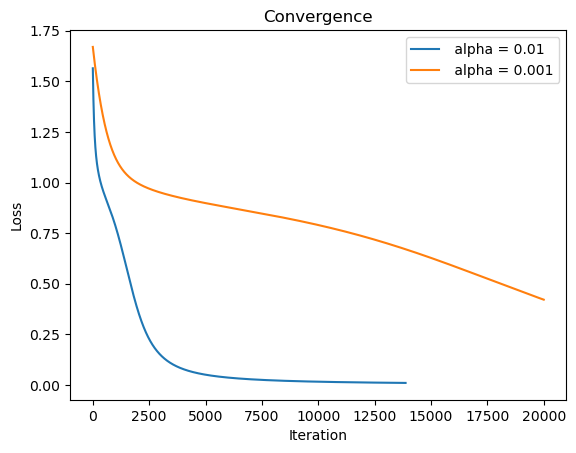

In [62]:
mlp.plot_convergence_graph( mlp.losses ,   ' alpha = 0.01 ')
mlp2.plot_convergence_graph( mlp2.losses , ' alpha = 0.001' )
plt.show()

In [63]:
mlp.accuracies[ : -10 : -1] , mlp2.accuracies[ : -10 : -1]

([100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
 [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0])

In [64]:
mlp.losses[ : -10 : -1] , mlp2.losses[ : -10 : -1]

([0.010213229130287918,
  0.010214229037176682,
  0.010215229128878385,
  0.010216229405442652,
  0.010217229866919737,
  0.010218230513359105,
  0.010219231344810965,
  0.010220232361324825,
  0.010221233562951113],
 [0.42146720215191663,
  0.4215069367937359,
  0.4215466734098989,
  0.4215864119997271,
  0.4216261525625427,
  0.42166589509766683,
  0.42170563960442137,
  0.4217453860821274,
  0.42178513453010585])

In [65]:
mlp3 = MLP_Classifier()
# mlp3.train( x_sample , Y , nx = 3 , nh = 4 , ny = 3 , epoches = 20000 , epsilon = 0.000001 , alpha = 0.01)

## Importing the dataset

In [66]:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        

(10000, 28, 28)

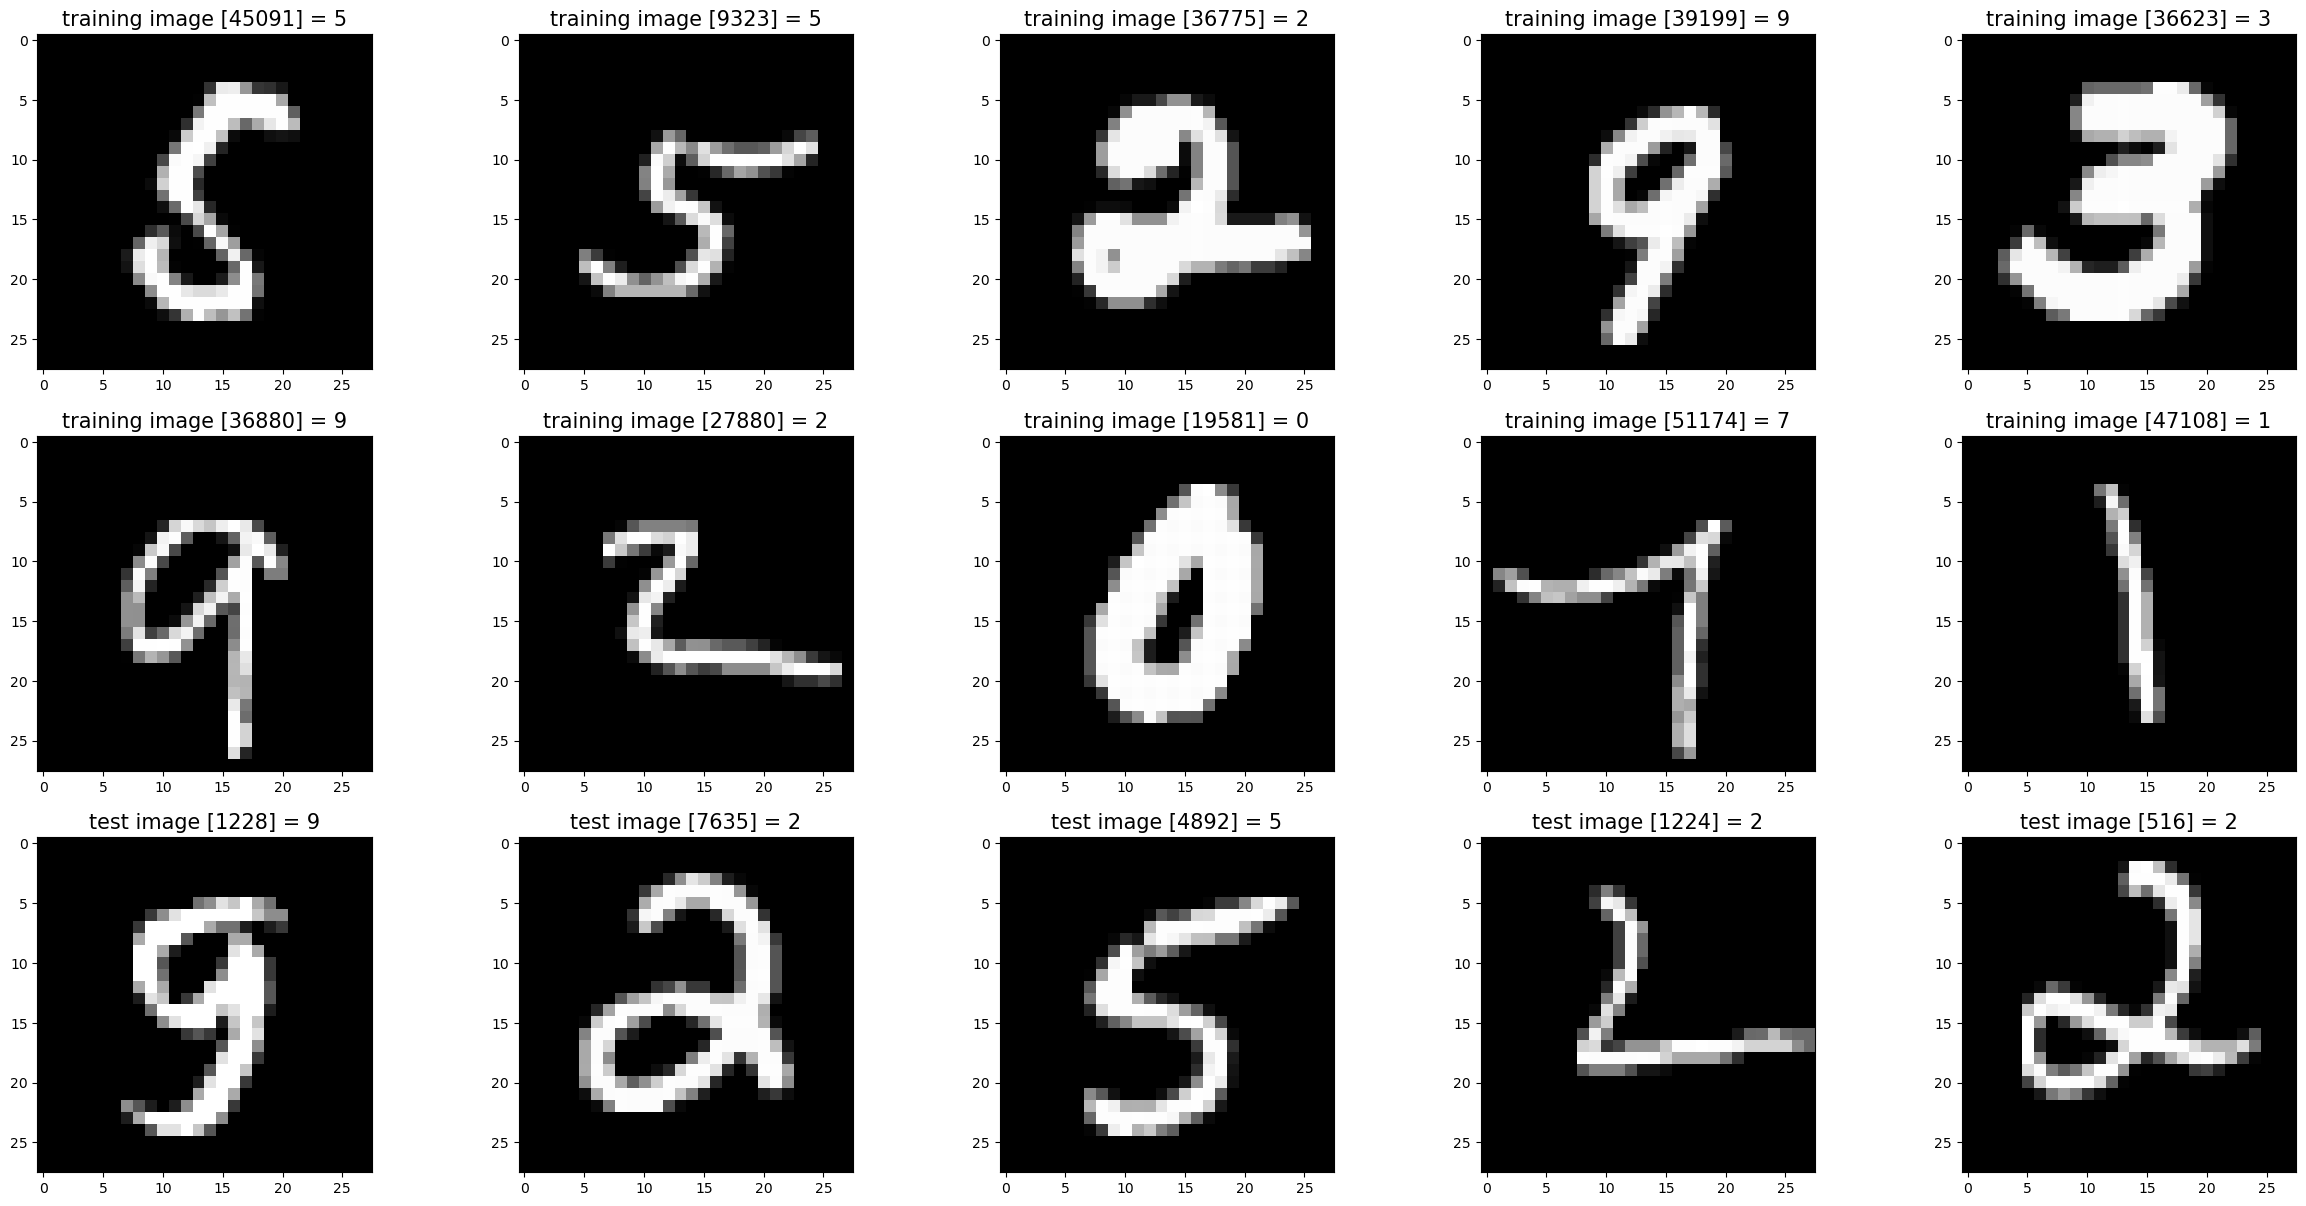

In [67]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = './Data'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)
np.array(x_test).shape

## Training the Modal

### Normalizing the dataset

In [68]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

x_train.shape

(60000, 28, 28)

In [69]:
x_test.shape   # each image is presented by 28 rows and 28 columns of pixels 
               # we need to convert this 3D vector into a 2D one so we could work with it
               # later when we need to display the images , we need to re-convert them into their original form

(10000, 28, 28)

In [70]:
classes = np.unique(y_train)  # all present labels

x_train = x_train.reshape( x_train.shape[0] , -1 )  
x_test = x_test.reshape( x_test.shape[0] , -1 )

In [71]:
x_train = x_train / 255
x_test = x_test / 255

In [72]:
x_train.shape

(60000, 784)

In [73]:
# mlp4 = MLP_Classifier()
# mlp4.train( x_train , y_train , nx = x_train.shape[1] , nh = 64 , ny = len(classes) , epoches = 100 , epsilon = 0.00001 , alpha = 0.01 )  would cause an error because we first need to one-hot encode the labels


In [74]:
import pandas as pd

def normalization_for_training( y ) :
 y = pd.DataFrame( y , columns = ['Label'])
 # pd.get_dummies(a , columns=['Label'] ).astype('int').rename( columns={f'Label_{i}' : i for i in range(10) } ).head()
 y = pd.get_dummies( y , columns=['Label'] ).astype('int')
 y = y.to_numpy()
 return y 

y_train = normalization_for_training(y_train)
y_test = normalization_for_training(y_test)

In [75]:
mlp4 = MLP_Classifier()

In [76]:
mlp4.init_params( nx = x_train.shape[1] , nh = 64 , ny = len(classes) )
mlp4.forward( x=x_train)[2].shape

(10, 60000)

In [77]:
y_train.shape

(60000, 10)

Convergence at iteration :  2669


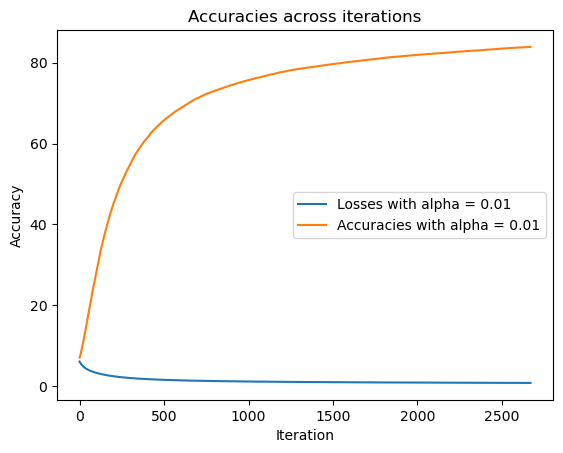

In [78]:
mlp5_1 = MLP_Classifier()
mlp5_1.init_params( nx = x_train.shape[1] , nh = 64 , ny = len(classes) )
mlp5_1.train( x = x_train , Y = y_train.T , nx = x_train.shape[1] , nh = 64 , ny = len(classes) , epoches = 5000 , epsilon = 0.0001 , alpha = 0.01 , mini_batch = False )  # Batch SGD

Convergence at epoch :  4


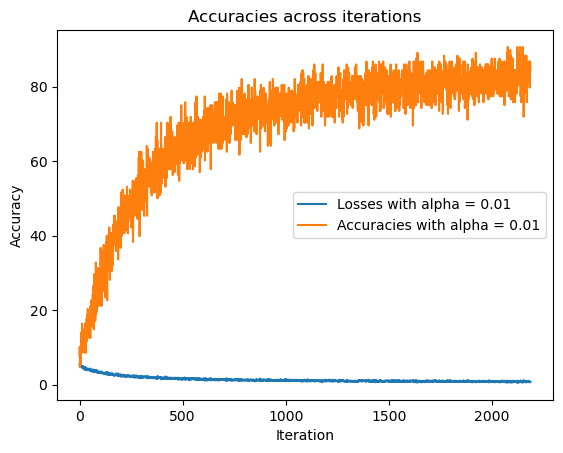

In [79]:
mlp5_2 = MLP_Classifier()
mlp5_2.init_params( nx = x_train.shape[1] , nh = 64 , ny = len(classes) )
# mlp5.SGD_Mini_Batch( epoches = 10000 , epsilon = 0.0001 , alpha = 0.01 , x = x_train , Y = y_train.T , batch_size = 128 )
mlp5_2.train( x = x_train , Y = y_train.T , nx = x_train.shape[1] , nh = 64 , ny = len(classes) , epoches = 5000 , epsilon = 0.0001 , alpha = 0.01 , batch_size = 128 )   # Mini_Batch SGD

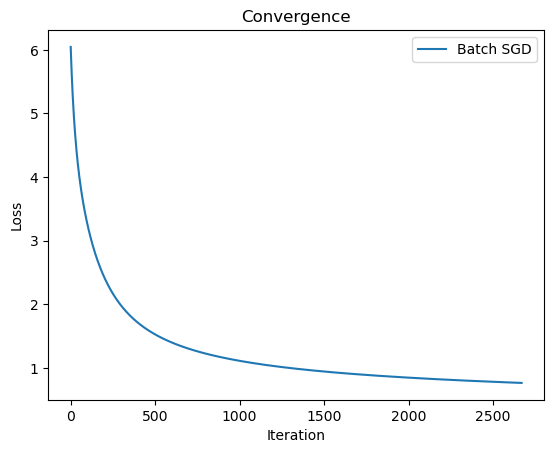

In [80]:
mlp5_1.plot_convergence_graph( label='Batch SGD' )

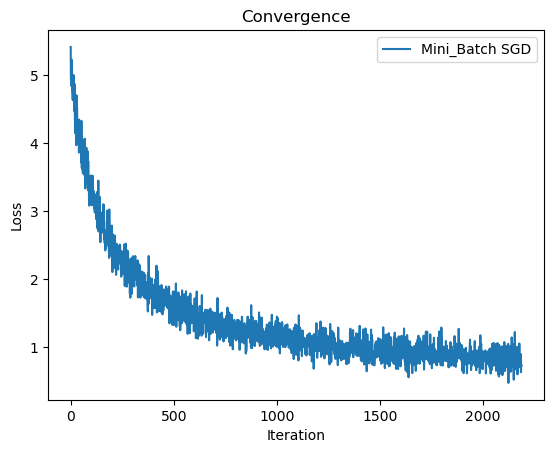

In [81]:
mlp5_2.plot_convergence_graph( label='Mini_Batch SGD' )

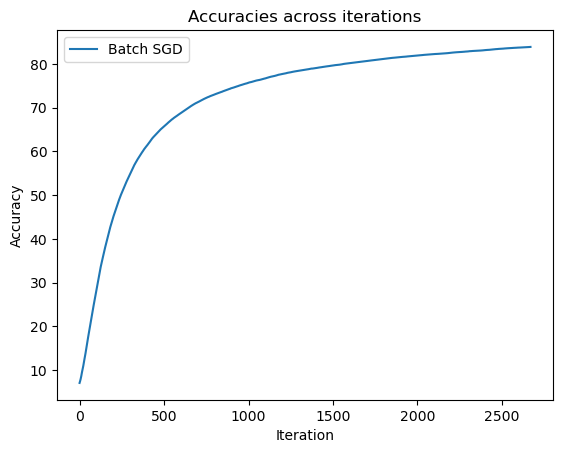

In [82]:
mlp5_1.plot_accuracies( label='Batch SGD' )

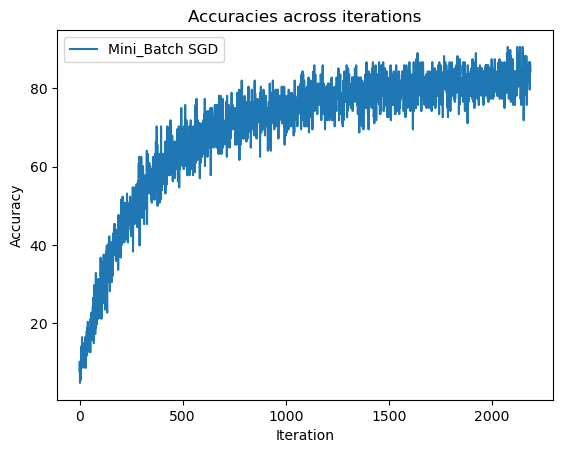

In [83]:
mlp5_2.plot_accuracies( label='Mini_Batch SGD' )

### Training

In [84]:
# mlp4.train( x = x_train , Y = y_train.T , nx = x_train.shape[1] , nh = 64 , ny = len(classes) , epoches = 10000 , epsilon = 0.0001 , alpha = 0.01 )

In [85]:
Yhat , y_pred = mlp5_2.forward( x = x_test[100: 120])[2:4] 

In [86]:
mlp5_2.losses[ : -10 : -1 ]

[0.7315513498924388,
 0.7315977209493749,
 0.7283045735655083,
 0.6307214210327985,
 0.8984407004745597,
 0.7951901685549511,
 0.7782003289429158,
 0.7011116980008921,
 0.7903435493279762]

In [87]:
y_pred

array([6, 0, 5, 4, 4, 9, 2, 1, 9, 4, 8, 1, 3, 9, 7, 4, 9, 4, 9, 7],
      dtype=int64)

In [88]:
Yhat

array([[5.36104832e-03, 9.79729271e-01, 2.10090669e-03, 1.53555913e-04,
        1.86135264e-03, 3.05086124e-05, 5.58978670e-03, 1.57661678e-03,
        1.65843906e-04, 1.17992879e-04, 4.54177713e-02, 1.49425522e-04,
        6.60219906e-03, 1.59210940e-06, 1.69493915e-05, 6.44837693e-05,
        6.08894911e-06, 5.03527960e-04, 6.78474862e-04, 5.80183090e-02],
       [8.93734296e-04, 4.13589699e-05, 3.94635979e-04, 4.48033083e-06,
        4.13399968e-04, 2.80550090e-05, 1.09834040e-05, 9.10245371e-01,
        1.39574177e-03, 1.41119325e-04, 6.97732775e-04, 5.71009874e-01,
        2.45566459e-03, 1.20980484e-03, 7.19409680e-04, 5.58771123e-04,
        1.17721694e-03, 4.81824912e-04, 4.99102502e-03, 2.12076250e-04],
       [6.73784838e-02, 3.37033249e-03, 5.93057708e-04, 9.64318092e-04,
        5.24680331e-02, 1.45258378e-03, 8.31229110e-01, 4.02355079e-04,
        4.04988613e-04, 3.10253547e-02, 2.93578973e-01, 4.95043940e-03,
        2.02012794e-02, 2.07122045e-03, 7.15097968e-03, 7.9395

In [89]:
y_test[100: 120].T

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]])

In [90]:
np.argmax( y_test[100: 120].T , axis = 0 )

array([6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2],
      dtype=int64)

### Getting the label of each sample ( from OneHotEncoding to the actual label of it )

In [91]:
y_test_labels  = np.argmax( y_test.T , axis = 0)

In [92]:
y_test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [93]:
_ , _ , _ ,  y_pred  = mlp5_2.forward( x = x_test )

In [94]:
y_test_labels[ : 10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [95]:
y_pred[ : 10 ]

array([7, 2, 1, 0, 4, 1, 8, 9, 2, 9], dtype=int64)

### Evaluating the Modal

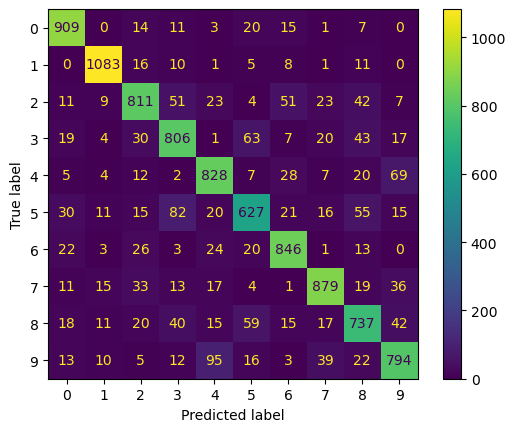

In [96]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
confM = confusion_matrix( y_true = y_test_labels , y_pred = y_pred )
cmDisplay = ConfusionMatrixDisplay( confM )
cmDisplay.plot()

### Making Predictions and comparing with the true labels

In [97]:
x_test = x_test.reshape( -1 , 28 , 28)  # so we can show it as an image

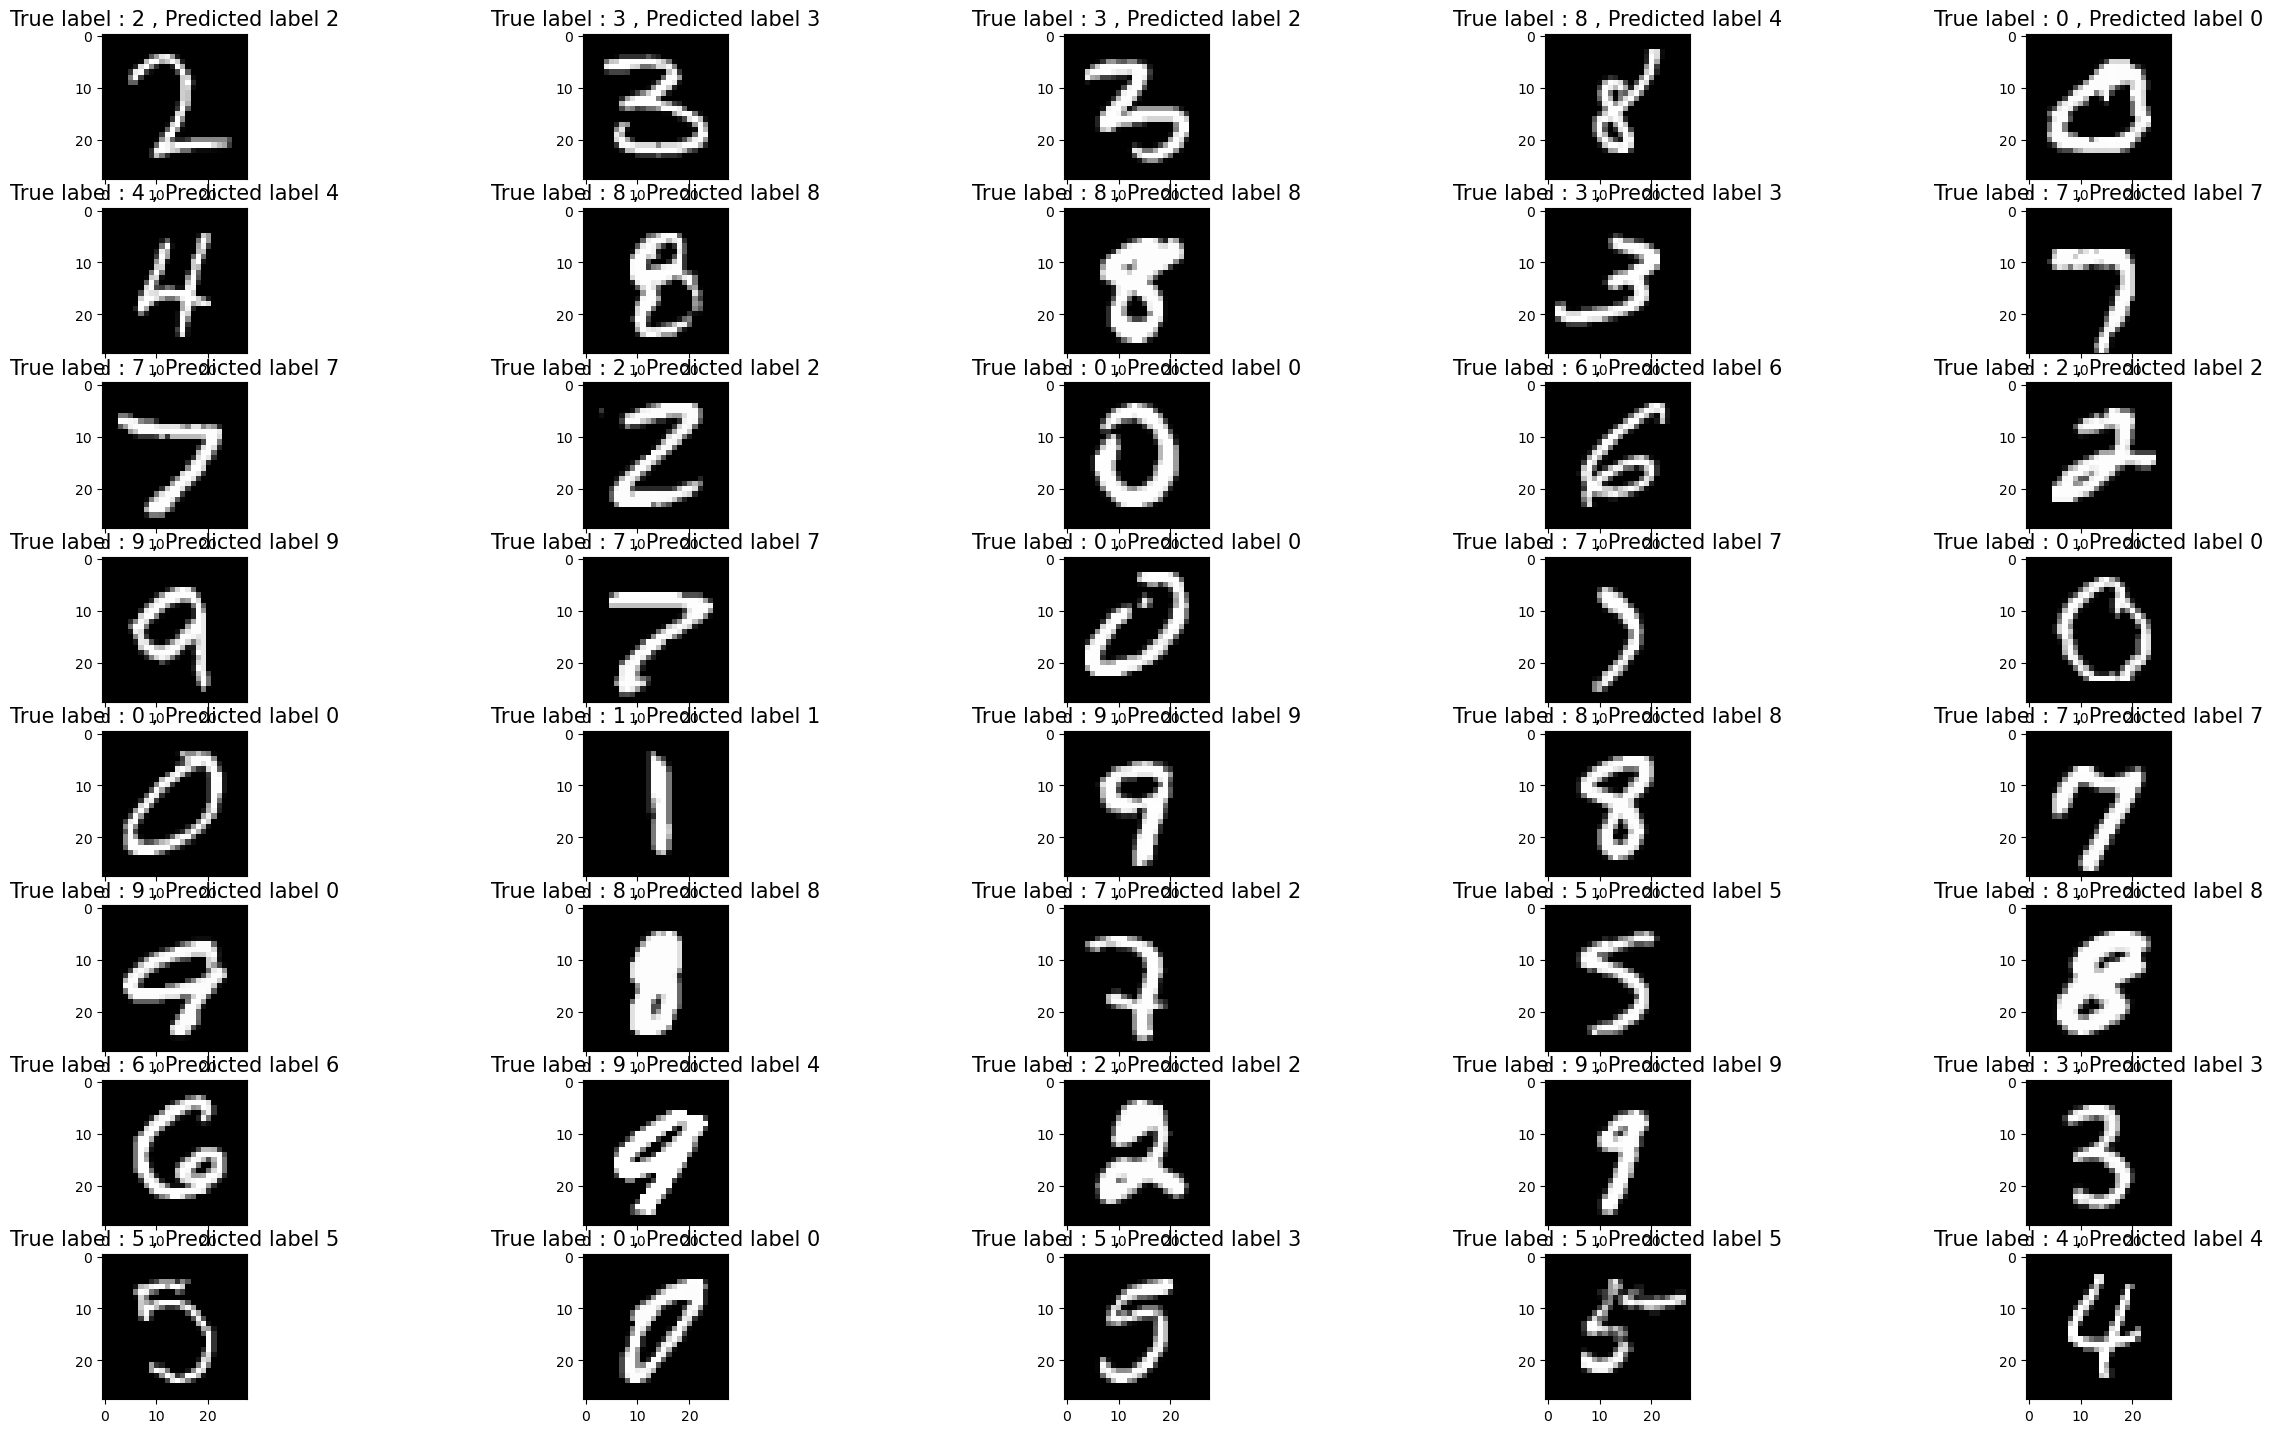

In [98]:
images_2_show = []
titles_2_show = []

for i in range(0, 40):
    r = random.randint(1, 10000)
    images_2_show.append( x_test[r] )
    titles_2_show.append( f'True label : {y_test_labels[r]} , Predicted label {y_pred[r] }' )    

show_images(images_2_show, titles_2_show)

## Testing functions

In [99]:
x = np.random.rand( 4 , 2 )
x = np.hstack( ( np.ones( ( x.shape[0] , 1) ) , x  )  )   # hstack = horizontal stack , to add a column to a matrix.
x

array([[1.        , 0.66813962, 0.61032224],
       [1.        , 0.87005652, 0.21749259],
       [1.        , 0.73014187, 0.25194476],
       [1.        , 0.33086451, 0.27004164]])

In [100]:
a_hidden = np.random.rand( 4 , 2 )
a_bias = np.ones( ( 1 , a_hidden.shape[1]) )
a_hidden = np.vstack( ( a_bias , a_hidden ) )  # vstack = vertical stack , to add a row to a matrix.
a_hidden

array([[1.00000000e+00, 1.00000000e+00],
       [5.02010396e-01, 9.89184035e-01],
       [2.90511563e-01, 1.53793836e-01],
       [9.90444153e-04, 2.12144116e-01],
       [4.52461602e-01, 8.23962421e-01]])